In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [3]:
df = pd.read_csv("KDD99_training.csv")

In [4]:
df.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,attack_class
0,0,0,0,0,181,5450,0,0,0,0,...,9,1.0,0.0,0.11,0.0,0.0,0.0,0.0,0.0,0
1,0,0,0,0,239,486,0,0,0,0,...,19,1.0,0.0,0.05,0.0,0.0,0.0,0.0,0.0,0
2,0,0,0,0,235,1337,0,0,0,0,...,29,1.0,0.0,0.03,0.0,0.0,0.0,0.0,0.0,0
3,0,0,0,0,219,1337,0,0,0,0,...,39,1.0,0.0,0.03,0.0,0.0,0.0,0.0,0.0,0
4,0,0,0,0,217,2032,0,0,0,0,...,49,1.0,0.0,0.02,0.0,0.0,0.0,0.0,0.0,0


### Univariate Analysis on some variables

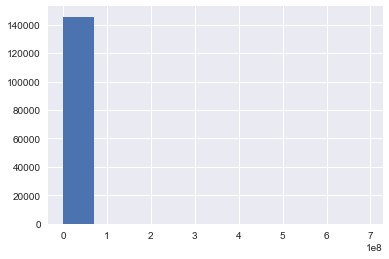

In [37]:
plt.hist(df.src_bytes,bins=10)
plt.show()

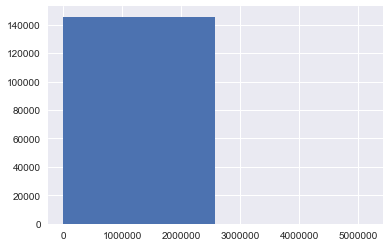

In [28]:
plt.hist(df.dst_bytes,bins=2)
plt.show()

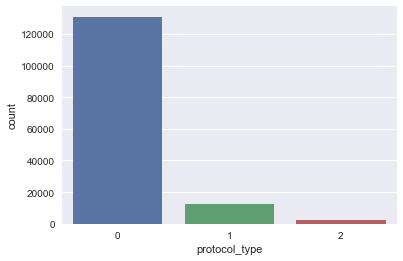

In [29]:
sns.countplot(x='protocol_type',data=df)

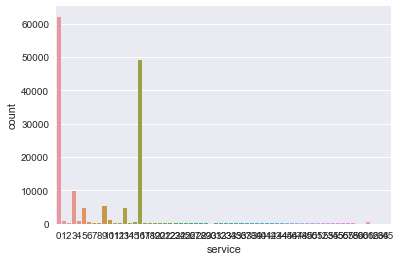

In [30]:
sns.countplot(x='service',data=df)

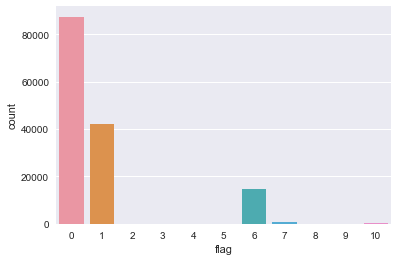

In [31]:
sns.countplot(x='flag',data=df)

### Data Preperation

In [6]:
df.shape #rows=145586, columns=40

(145585, 40)

From below graph we can say that dataset is balanced so it will be well for predictive modelling

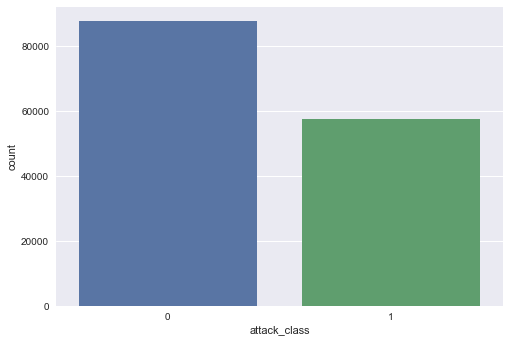

In [14]:
sns.countplot(x='attack_class',data=df)

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145585 entries, 0 to 145584
Data columns (total 40 columns):
duration                       145585 non-null int64
protocol_type                  145585 non-null int64
service                        145585 non-null int64
flag                           145585 non-null int64
src_bytes                      145585 non-null int64
dst_bytes                      145585 non-null int64
land                           145585 non-null int64
wrong_fragment                 145585 non-null int64
urgent                         145585 non-null int64
hot                            145585 non-null int64
num_failed_logins              145585 non-null int64
logged_in                      145585 non-null int64
num_compromised                145585 non-null int64
root_shell                     145585 non-null int64
su_attempted                   145585 non-null int64
num_root                       145585 non-null int64
num_file_creations             145585 non

In [21]:
# Lets calculate the missing values
df.isnull().sum()

duration                       0
protocol_type                  0
service                        0
flag                           0
src_bytes                      0
dst_bytes                      0
land                           0
wrong_fragment                 0
urgent                         0
hot                            0
num_failed_logins              0
logged_in                      0
num_compromised                0
root_shell                     0
su_attempted                   0
num_root                       0
num_file_creations             0
num_shells                     0
num_access_files               0
is_guest_login                 0
count                          0
srv_count                      0
serror_rate                    0
srv_serror_rate                0
rerror_rate                    0
srv_rerror_rate                0
same_srv_rate                  0
diff_srv_rate                  0
srv_diff_host_rate             0
dst_host_count                 0
dst_host_s

In [23]:
# Description about the dataset
df.describe()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,attack_class
count,145585.000000,145585.000000,145585.000000,145585.000000,1.455850e+05,1.455850e+05,145585.000000,145585.000000,145585.000000,145585.000000,...,145585.000000,145585.000000,145585.000000,145585.000000,145585.000000,145585.000000,145585.000000,145585.000000,145585.000000,145585.000000
mean,132.026088,0.117299,8.091747,0.958471,7.995754e+03,2.859800e+03,0.000137,0.020201,0.000048,0.100175,...,129.935563,0.553219,0.061389,0.092819,0.019048,0.291599,0.290980,0.110464,0.107676,0.396696
std,1224.161209,0.369567,9.596463,1.878185,1.820390e+06,6.081000e+04,0.011720,0.239369,0.010150,1.426803,...,114.714725,0.456236,0.147021,0.241112,0.060410,0.452493,0.453448,0.306098,0.304221,0.489214
min,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,...,12.000000,0.050000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,4.000000,0.000000,1.470000e+02,1.050000e+02,0.000000,0.000000,0.000000,0.000000,...,117.000000,0.770000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,16.000000,1.000000,2.880000e+02,1.165000e+03,0.000000,0.000000,0.000000,0.000000,...,255.000000,1.000000,0.070000,0.030000,0.020000,1.000000,1.000000,0.000000,0.000000,1.000000
max,58329.000000,2.000000,65.000000,10.000000,6.933756e+08,5.155468e+06,1.000000,3.000000,3.000000,30.000000,...,255.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [32]:
df.columns

Index(['duration', 'protocol_type', 'service', 'flag', 'src_bytes',
       'dst_bytes', 'land', 'wrong_fragment', 'urgent', 'hot',
       'num_failed_logins', 'logged_in', 'num_compromised', 'root_shell',
       'su_attempted', 'num_root', 'num_file_creations', 'num_shells',
       'num_access_files', 'is_guest_login', 'count', 'srv_count',
       'serror_rate', 'srv_serror_rate', 'rerror_rate', 'srv_rerror_rate',
       'same_srv_rate', 'diff_srv_rate', 'srv_diff_host_rate',
       'dst_host_count', 'dst_host_srv_count', 'dst_host_same_srv_rate',
       'dst_host_diff_srv_rate', 'dst_host_same_src_port_rate',
       'dst_host_srv_diff_host_rate', 'dst_host_serror_rate',
       'dst_host_srv_serror_rate', 'dst_host_rerror_rate',
       'dst_host_srv_rerror_rate', 'attack_class'],
      dtype='object')

From above we can say that there is no missing values

Feature ranking:
1. feature 26 (0.868703)
2. feature 4 (0.030860)
3. feature 9 (0.028055)
4. feature 7 (0.027483)
5. feature 1 (0.021971)
6. feature 23 (0.011259)
7. feature 21 (0.009468)
8. feature 35 (0.001594)
9. feature 5 (0.000279)
10. feature 20 (0.000139)
11. feature 24 (0.000119)
12. feature 2 (0.000030)
13. feature 31 (0.000030)
14. feature 11 (0.000010)
15. feature 12 (0.000000)
16. feature 13 (0.000000)
17. feature 38 (0.000000)
18. feature 8 (0.000000)
19. feature 10 (0.000000)
20. feature 15 (0.000000)
21. feature 6 (0.000000)
22. feature 3 (0.000000)
23. feature 14 (0.000000)
24. feature 19 (0.000000)
25. feature 16 (0.000000)
26. feature 17 (0.000000)
27. feature 18 (0.000000)
28. feature 37 (0.000000)
29. feature 22 (0.000000)
30. feature 25 (0.000000)
31. feature 27 (0.000000)
32. feature 28 (0.000000)
33. feature 29 (0.000000)
34. feature 30 (0.000000)
35. feature 32 (0.000000)
36. feature 33 (0.000000)
37. feature 34 (0.000000)
38. feature 36 (0.000000)
39. feature 0

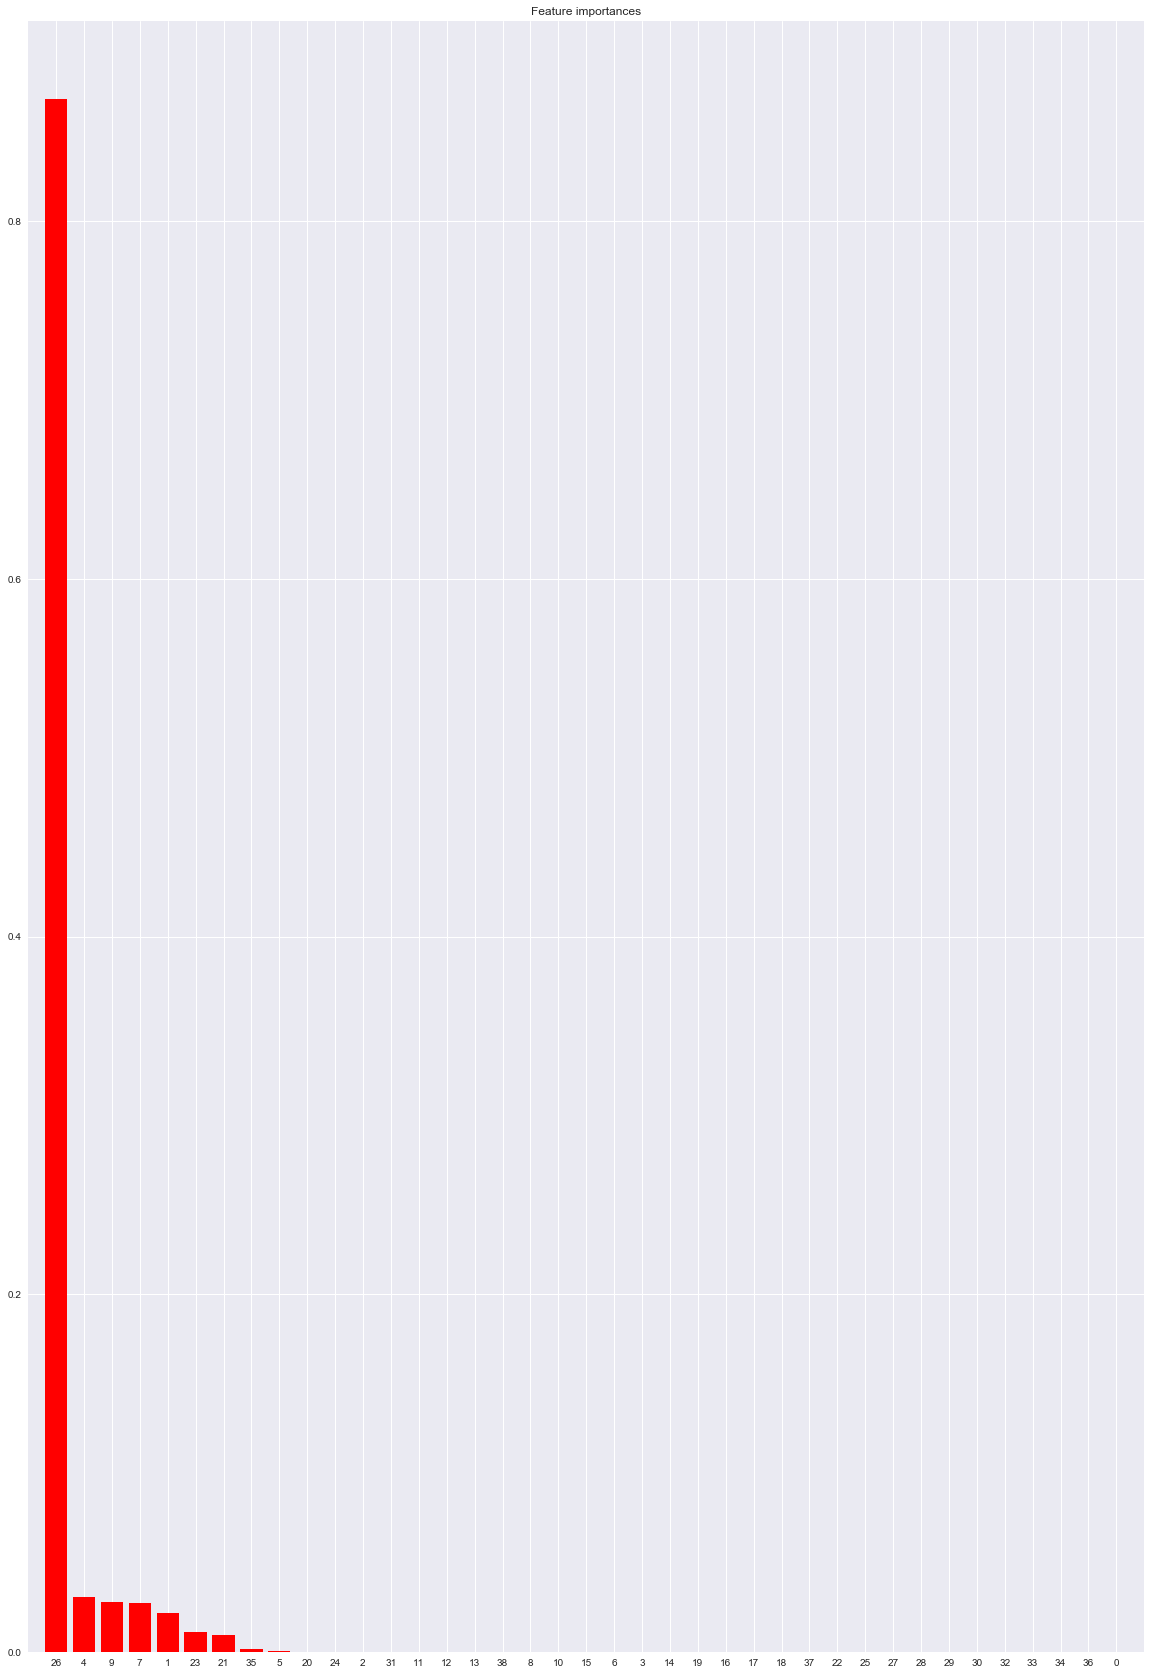

In [34]:
# Calculating Feature imprtance using Decision Trees
#Lets calculate which features are best suited for predicting target variable
from sklearn import tree

y = df.attack_class.values
X = df[['duration', 'protocol_type', 'service', 'flag', 'src_bytes',
       'dst_bytes', 'land', 'wrong_fragment', 'urgent', 'hot',
       'num_failed_logins', 'logged_in', 'num_compromised', 'root_shell',
       'su_attempted', 'num_root', 'num_file_creations', 'num_shells',
       'num_access_files', 'is_guest_login', 'count', 'srv_count',
       'serror_rate', 'srv_serror_rate', 'rerror_rate', 'srv_rerror_rate',
       'same_srv_rate', 'diff_srv_rate', 'srv_diff_host_rate',
       'dst_host_count', 'dst_host_srv_count', 'dst_host_same_srv_rate',
       'dst_host_diff_srv_rate', 'dst_host_same_src_port_rate',
       'dst_host_srv_diff_host_rate', 'dst_host_serror_rate',
       'dst_host_srv_serror_rate', 'dst_host_rerror_rate',
       'dst_host_srv_rerror_rate']].values

# Build a forest and compute the feature importances

clf = tree.DecisionTreeClassifier(max_depth=5)
clf.fit(X,y)
importances = clf.feature_importances_

indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")

for f in range(X.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

# Plot the feature importances of the forest
plt.figure(figsize=(20,30))
plt.title("Feature importances")
plt.bar(range(X.shape[1]), importances[indices],
       color="r", align="center")
plt.xticks(range(X.shape[1]), indices)
plt.xlim([-1, X.shape[1]])
plt.show()

From the above figure we can say that features at position 26,4,9,7,1,23,21,35,5

Now Lets Examine these features. These features are at highest priority for prection

In [35]:
df.columns

Index(['duration', 'protocol_type', 'service', 'flag', 'src_bytes',
       'dst_bytes', 'land', 'wrong_fragment', 'urgent', 'hot',
       'num_failed_logins', 'logged_in', 'num_compromised', 'root_shell',
       'su_attempted', 'num_root', 'num_file_creations', 'num_shells',
       'num_access_files', 'is_guest_login', 'count', 'srv_count',
       'serror_rate', 'srv_serror_rate', 'rerror_rate', 'srv_rerror_rate',
       'same_srv_rate', 'diff_srv_rate', 'srv_diff_host_rate',
       'dst_host_count', 'dst_host_srv_count', 'dst_host_same_srv_rate',
       'dst_host_diff_srv_rate', 'dst_host_same_src_port_rate',
       'dst_host_srv_diff_host_rate', 'dst_host_serror_rate',
       'dst_host_srv_serror_rate', 'dst_host_rerror_rate',
       'dst_host_srv_rerror_rate', 'attack_class'],
      dtype='object')

### Plotting Some Most top level imprtant variables

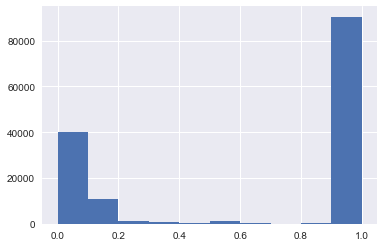

In [38]:
# Plotting variable at index 26
#same_srv_rate
plt.hist(df.same_srv_rate,bins=10)
plt.show()

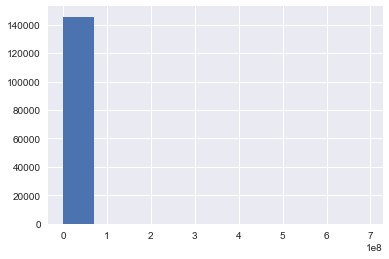

In [39]:
# Plotting variable at index 4
# src_bytes
plt.hist(df.src_bytes,bins=10)
plt.show()

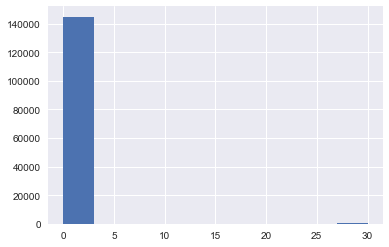

In [41]:
# Plotting variable at index 9
# hot
plt.hist(df.hot,bins=10)
plt.show()

### Predictive Modelling

Two Classifiers will be used 

1. Logistic Regression
2. Random Forest Classifier

## Logistic Regression Classifier

In [43]:
from sklearn.linear_model import LogisticRegression

In [44]:
df.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,attack_class
0,0,0,0,0,181,5450,0,0,0,0,...,9,1.0,0.0,0.11,0.0,0.0,0.0,0.0,0.0,0
1,0,0,0,0,239,486,0,0,0,0,...,19,1.0,0.0,0.05,0.0,0.0,0.0,0.0,0.0,0
2,0,0,0,0,235,1337,0,0,0,0,...,29,1.0,0.0,0.03,0.0,0.0,0.0,0.0,0.0,0
3,0,0,0,0,219,1337,0,0,0,0,...,39,1.0,0.0,0.03,0.0,0.0,0.0,0.0,0.0,0
4,0,0,0,0,217,2032,0,0,0,0,...,49,1.0,0.0,0.02,0.0,0.0,0.0,0.0,0.0,0


In [45]:
X=df.drop(['attack_class'],axis=1)
y=df['attack_class']

In [46]:
# Training the Classifier
clf=LogisticRegression()
clf.fit(X,y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [49]:
# Testing the Classifier
df_test=pd.read_csv('C:/Users/gagan/Downloads/kddcup_testing.csv')

In [50]:
df_test.shape

(614450, 40)

In [51]:
df_test.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,attack_class
0,0,0,0,0,215,45076,0,0,0,0,...,0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0
1,0,0,0,0,162,4528,0,0,0,0,...,1,1.0,0.0,1.00,0.0,0.0,0.0,0.0,0.0,0
2,0,0,0,0,236,1228,0,0,0,0,...,2,1.0,0.0,0.50,0.0,0.0,0.0,0.0,0.0,0
3,0,0,0,0,233,2032,0,0,0,0,...,3,1.0,0.0,0.33,0.0,0.0,0.0,0.0,0.0,0
4,0,0,0,0,239,486,0,0,0,0,...,4,1.0,0.0,0.25,0.0,0.0,0.0,0.0,0.0,0


In [52]:
X_test=df_test.drop(['attack_class'],axis=1)
y_test=df_test['attack_class']

In [53]:
# Precition
Y_predict=clf.predict(X_test)

In [55]:
# Classification Report
from sklearn.metrics import classification_report
print(classification_report(y_test, Y_predict))

             precision    recall  f1-score   support

          0       0.99      0.99      0.99    559276
          1       0.95      0.90      0.92     55174

avg / total       0.99      0.99      0.99    614450



In [56]:
# Plotting Confusion metrics(Getting TP,TN,FP,FN)
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, Y_predict))

[[556448   2828]
 [  5575  49599]]


## Random Forest Classifier

In [57]:
from sklearn.ensemble import RandomForestClassifier
model=RandomForestClassifier(n_jobs=-1,class_weight='balanced')
model.fit(X,y)

RandomForestClassifier(bootstrap=True, class_weight='balanced',
            criterion='gini', max_depth=None, max_features='auto',
            max_leaf_nodes=None, min_impurity_split=1e-07,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=-1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [58]:
# Precition
Y_predict=model.predict(X_test)

In [59]:
# Classification Report
from sklearn.metrics import classification_report
print(classification_report(y_test, Y_predict))

             precision    recall  f1-score   support

          0       1.00      1.00      1.00    559276
          1       1.00      1.00      1.00     55174

avg / total       1.00      1.00      1.00    614450



In [60]:
# Plotting Confusion metrics(Getting TP,TN,FP,FN)
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, Y_predict))

[[559221     55]
 [   105  55069]]
